In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder

<>:4: SyntaxWarning: invalid escape sequence '\A'
<>:4: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Om\AppData\Local\Temp\ipykernel_17592\2530700530.py:4: SyntaxWarning: invalid escape sequence '\A'
  file_path = "E:\AIML Tasks\Titanic-Dataset.csv"


Saved raw_age_distribution.png


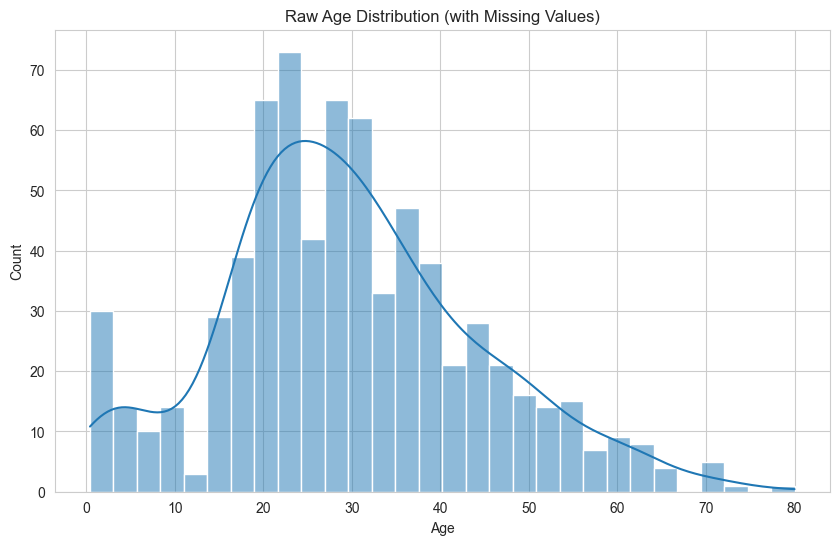

In [3]:
sns.set_style('whitegrid')

# Raw Data
file_path = "E:\AIML Tasks\Titanic-Dataset.csv"
df_raw = pd.read_csv(file_path)

#Plot 1: Age Distribution (Raw)
plt.figure(figsize=(10,6))
sns.histplot(df_raw['Age'], kde=True, bins=30)
plt.title('Raw Age Distribution (with Missing Values)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('raw_age_distribution.png')
print("Saved raw_age_distribution.png")

Saved raw_embarked_distribution.png


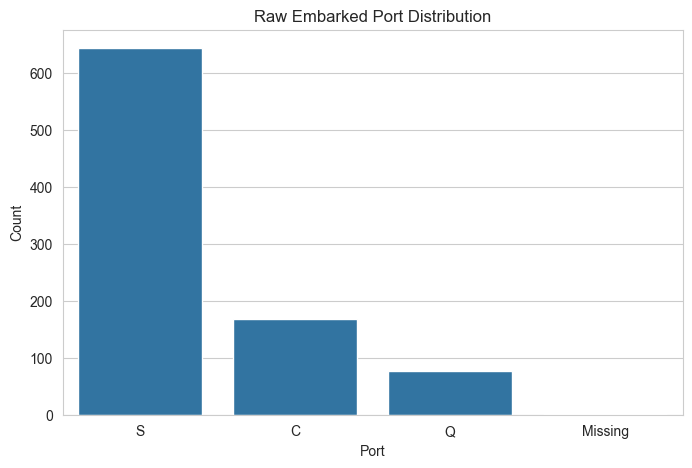

In [4]:
#Plot 2: Embarked Port Distribution (Raw)
# We fill NaNs with 'Missing' for visualization purposes
plt.figure(figsize=(8,5))
sns.countplot(x=df_raw['Embarked'].fillna('Missing'))
plt.title('Raw Embarked Port Distribution')
plt.xlabel('Port')
plt.ylabel('Count')
plt.savefig('raw_embarked_distribution.png')
print("Saved raw_embarked_distribution.png")

Saved raw_survival_by_Pclass_Sex.png


<Figure size 1200x700 with 0 Axes>

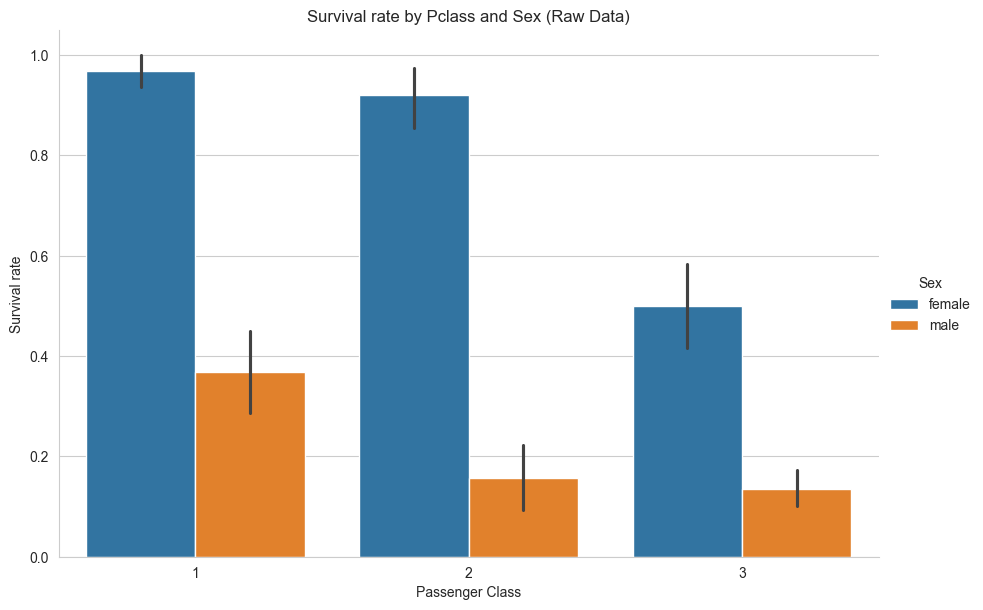

In [5]:
#Plot 3: Survival by Pclass and Sex (Raw)
plt.figure(figsize=(12,7))
sns.catplot(data=df_raw, x='Pclass', y='Survived', hue='Sex', kind='bar', height=6, aspect=1.5)
plt.title('Survival rate by Pclass and Sex (Raw Data)')
plt.xlabel('Passenger Class')
plt.ylabel('Survival rate')
plt.savefig('raw_survival_by_Pclass_Sex.png')
print("Saved raw_survival_by_Pclass_Sex.png")

In [7]:
file_path = 'E:\AIML Tasks\Titanic-Dataset.csv'
df_eda = pd.read_csv(file_path)

# Imputing 'Embarked' (minimal missing)
embarked_mode = df_eda['Embarked'].mode()[0]
df_eda['Embarked'] = df_eda['Embarked'].fillna(embarked_mode)

# --- Feature Engineering ---

# 1. Create 'Title'
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

df_eda['Title'] = df_eda['Name'].apply(get_title)
# Group rare titles
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df_eda['Title'] = df_eda['Title'].apply(lambda x: x if x in common_titles else 'Other')

# 2. Create 'FamilySize' and 'IsAlone'
df_eda['FamilySize'] = df_eda['SibSp'] + df_eda['Parch'] + 1
df_eda['IsAlone'] = (df_eda['FamilySize'] == 1).astype(int)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Om\AppData\Local\Temp\ipykernel_17592\2924335147.py:1: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'E:\AIML Tasks\Titanic-Dataset.csv'
C:\Users\Om\AppData\Local\Temp\ipykernel_17592\2924335147.py:12: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


Saved engineered_survival_by_title.png


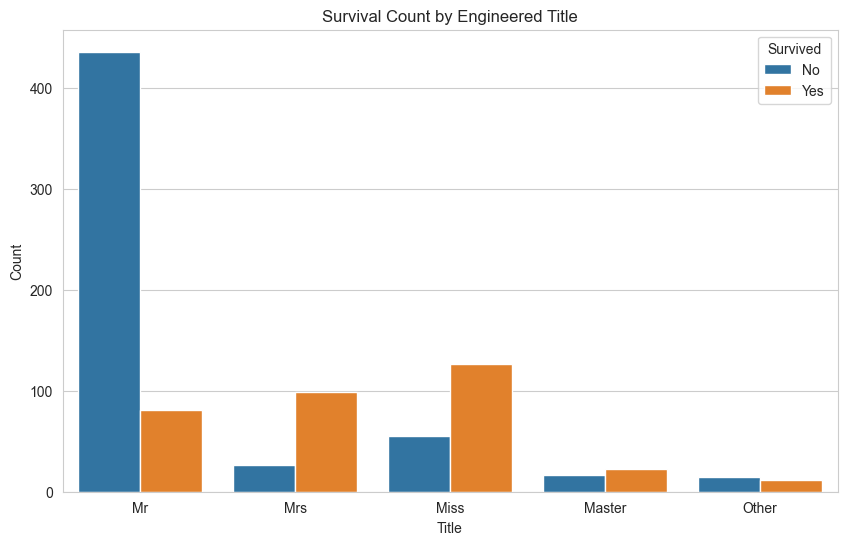

In [8]:
#Plot 4: Survival by Engineered 'Title'
plt.figure(figsize=(10, 6))
sns.countplot(data=df_eda, x='Title', hue='Survived')
plt.title('Survival Count by Engineered Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('engineered_survival_by_title.png')
print("Saved engineered_survival_by_title.png")

Saved engineered_survival_by_familysize.png


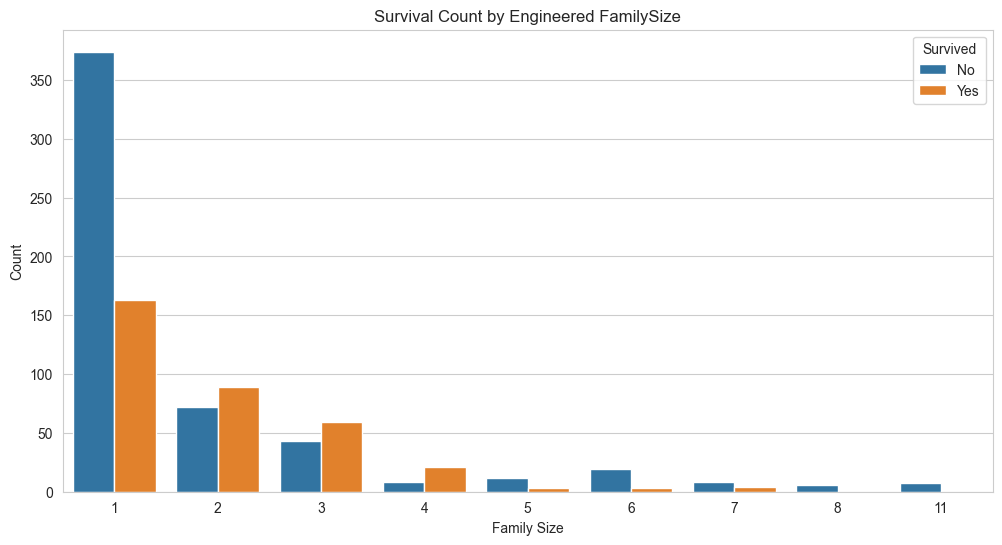

In [9]:
#Plot 5: Survival by Engineered 'FamilySize'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_eda, x='FamilySize', hue='Survived')
plt.title('Survival Count by Engineered FamilySize')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('engineered_survival_by_familysize.png')
print("Saved engineered_survival_by_familysize.png")

Saved engineered_survival_by_isalone.png


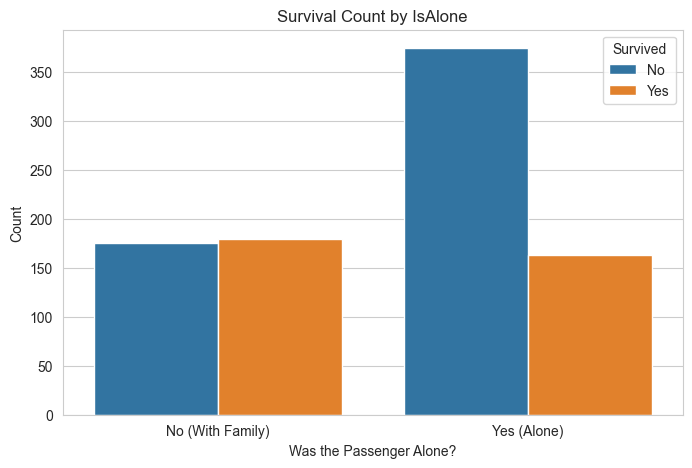

In [10]:
#Plot 6: Survival by Engineered 'IsAlone'
# Remapping 0/1 to 'No'/'Yes' for a clearer plot label
is_alone_map = {0: 'No (With Family)', 1: 'Yes (Alone)'}
df_eda['IsAlone_Plot'] = df_eda['IsAlone'].map(is_alone_map)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_eda, x='IsAlone_Plot', hue='Survived')
plt.title('Survival Count by IsAlone')
plt.xlabel('Was the Passenger Alone?')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.savefig('engineered_survival_by_isalone.png')
print("Saved engineered_survival_by_isalone.png")

Correlation Heatmap

In [11]:
file_path = 'E:\AIML Tasks\Titanic-Dataset.csv'
df = pd.read_csv(file_path)

# Drop columns
df = df.drop(columns=['Cabin', 'PassengerId', 'Ticket'])

# Feature Engineering: 'Title'
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""
df['Title'] = df['Name'].apply(get_title)
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df['Title'] = df['Title'].apply(lambda x: x if x in common_titles else 'Other')
df = df.drop(columns=['Name'])

# Feature Engineering: 'FamilySize' & 'IsAlone'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
df = df.drop(columns=['SibSp', 'Parch'])

# Categorical Encoding: 'Sex'
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex']) # male=1, female=0

# Categorical Encoding: 'Embarked' & 'Title'
df = pd.get_dummies(df, columns=['Embarked', 'Title'], drop_first=True)

# --- 2. Impute 'Age' for Correlation ---
# The correlation matrix needs all data to be non-null.
# We fill 'Age' with the median for this visualization.
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Om\AppData\Local\Temp\ipykernel_17592\2783583967.py:1: SyntaxWarning: invalid escape sequence '\A'
  file_path = 'E:\AIML Tasks\Titanic-Dataset.csv'
C:\Users\Om\AppData\Local\Temp\ipykernel_17592\2783583967.py:9: SyntaxWarning: invalid escape sequence '\.'
  title_search = re.search(' ([A-Za-z]+)\.', name)


Saved final_correlation_heatmap.png


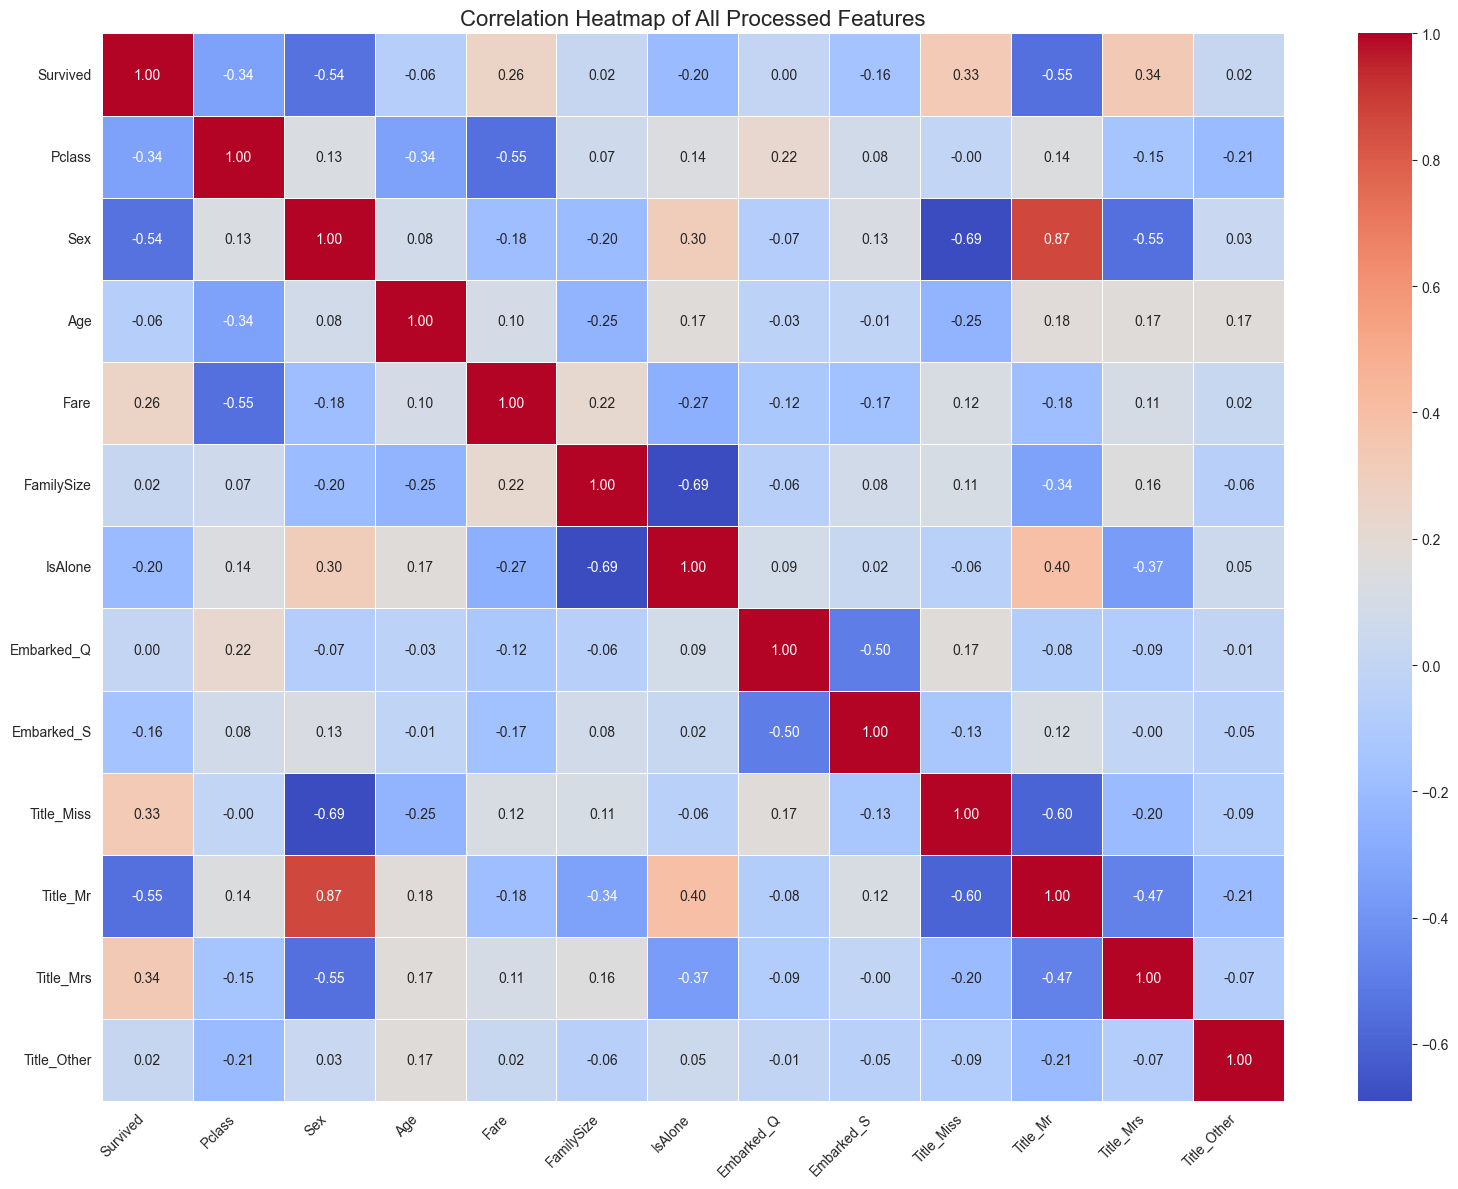

In [12]:
#Plot 7: Correlation Heatmap
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,          # Show the correlation values
    fmt='.2f',           # Format to 2 decimal places
    cmap='coolwarm',     # Use a diverging colormap
    linewidths=0.5
)
plt.title('Correlation Heatmap of All Processed Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('final_correlation_heatmap.png')
print("Saved final_correlation_heatmap.png")